# Symbulate Documentation

# Symbulate Graphics

The `.plot()` method produces a graphic of simulated values of random variables or processes.

<a id='contents'></a>

1. [**Rug plot of individual values**](#rug)
1. [**Impulse plot**](#impulse)
1. [**Histogram**](#hist)
1. [**Density**](#density)
1. [**Scatterplot**](#scatter)
1. [**Tile plot**](#tile)
1. [**Two-dimensional histogram**](#hist2d)
1. [**Two-dimensional density**](#density2d)
1. [**Sample path plot**](#path)
1. [**Customizing plots**](#custom)

< [Markov processes](mc.html) | [Contents](index.html)  >

Be sure to import Symbulate using the following commands.
<a id='rv'></a>

In [1]:
from symbulate import *
%matplotlib inline

<a id='rug'></a>

### Rug plot of individual values

A random variable maps outcomes in a probability space to real numbers.  When the number of simulated values is small, it is sometimes useful to visualize the individual values along a number line. 

*Example.* Rug plot of 50 simulated values of a random variable with an Exponential(1) distribution.

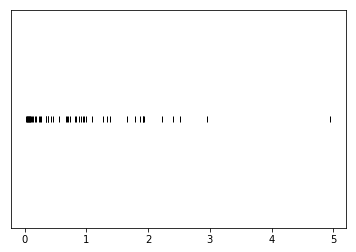

In [2]:
RV(Exponential(rate=1)).sim(50).plot(type="rug")

For a discrete random variable, the hashmarks of the rug plot are jittered slightly to signify multiple occurrences of simulated values.  

*Example.* Rug plot of 50 simulated values of a random variable with a Poisson(10) distribution.

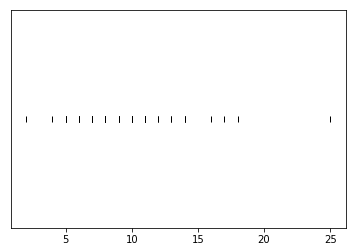

In [3]:
RV(Poisson(10)).sim(50).plot(type="rug")

Rug plots emphasize that a random variable takes values along a number line.  However, rug plots are generally not an appropriate summary of the simulated values.  The plots that follow are more effective summaries of simulation output.

<a id='impulse'></a>

### Impulse plot

The default plot summary of the simulated values of a discrete random variable is an impulse plot which displays the simulated values and their relative frequencies.

*Example.* Impulse plot of simulated values of a random variable with a Poisson(3) distribution.

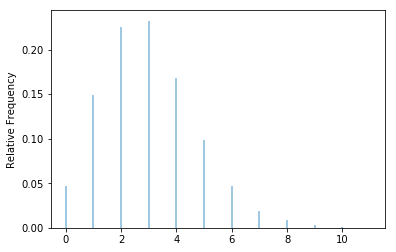

In [4]:
RV(Poisson(3)).sim(10000).plot()

The `normalize` option controls whether relative frequencies (`normalize=True`, the default) or count frequencies (`normalize=False`) are displayed.

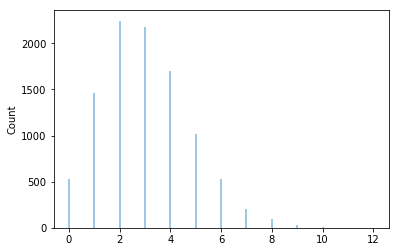

In [5]:
RV(Poisson(3)).sim(10000).plot(normalize=False)

<a id='hist'></a>

### Histogram

Impulse plots are not appropriate for continuous random variables since each simulated value typically only occurs once.  (Calling `type="impulse"` for simulated values of a continuous random variable essentially produces a rug plot.)

For *continuous* random variables, the `plot` method produces a **histogram**, which displays the frequencies of simulated values falling in interval "bins".  By default, the vertical axis of the histogram is on the *density* scale, so that *areas* of the bars correspond to relative frequencies.  (Bin frequencies (counts) can be obtained using the `normalize=False` option.)

*Example.* Histogram of simulated values of a random variable with a Normal(0, 1) distribution.

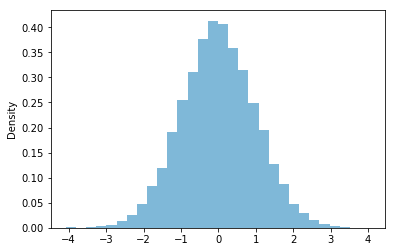

In [6]:
RV(Normal(mean=0, sd=1)).sim(10000).plot()

*Example.* Histogram of 50 simulated values of a random variable with an Exponential distribution, with the individual values displayed in a "rug" along the horizontal axis.

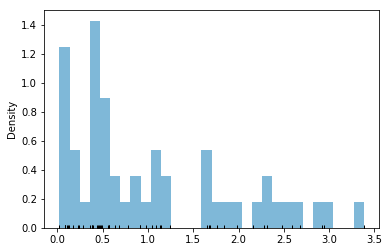

In [7]:
RV(Exponential(rate=1)).sim(50).plot(type=["hist", "rug"])

The number of bins can be set manually with the `bins` argument.

*Example.* Histogram of simulated values of a random variable with a Beta(0.5, 0.5) distribution.

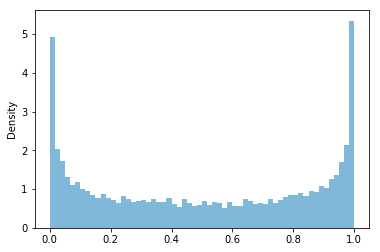

In [8]:
RV(Beta(a=0.5, b=0.5)).sim(10000).plot(bins=60)

A histogram is the default plot type for simulated values of a continuous random variable, while an impulse plot is the default plot type for simulated values of a discrete random variable.  However, if many of the simulated values of a discrete random variable have small frequencies `.plot()` will return a histogram rather than an impulse plot.

*Example.* Histogram of 100 simulated values of a random variable with a Binomial(1000, 0.5) distribution.

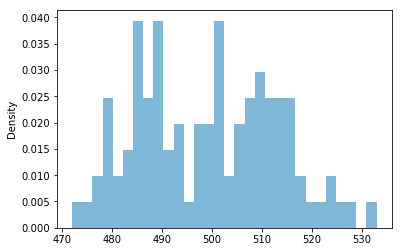

In [9]:
RV(Binomial(n=1000, p=0.5)).sim(100).plot()

<a id='density'></a>

### Density

The `density` plot type uses simulated values of a continuous random variable to estimate its probability density function and display it.

*Example.* Density plot of simulated values of a random variable with a Normal(0, 1) distribution.

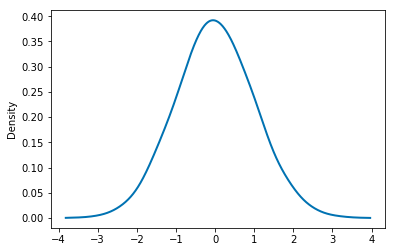

In [10]:
RV(Normal(mean=0, sd=1)).sim(10000).plot("density")

A density plot is a essentially a smoothed histogram.  Both plots can be displayed in the same figure.

*Example.* Histogram and density plot of simulated values of a random variable with an Exponential distribution with rate 1.

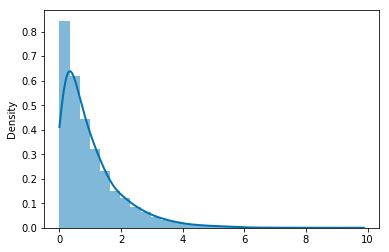

In [11]:
RV(Exponential(1)).sim(10000).plot(type=["hist", "density"])

As the above plot illustrates, density estimates can be unreliable at the extremes of the simulated values.

*Example.* Histogram and density plot of simulated values of a random variable with a Uniform distribution on (0, 1).  Notice that the estimated density loses accuracy near the boundaries 0 and 1.  

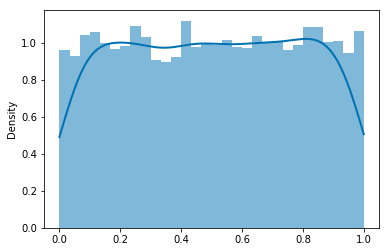

In [12]:
RV(Uniform(a=0, b=1)).sim(10000).plot(type=["hist", "density"])

For the simulated values of a discrete random variable, the `density` type produces a plot of the simulated values and their relative frequencies.  (The plot displays the same information as an impulse plot, just in a different visual.)


*Example.* Impulse plot of simulated values of a random variable with a Poisson(3) distribution.  Compare with the impulse plot above.

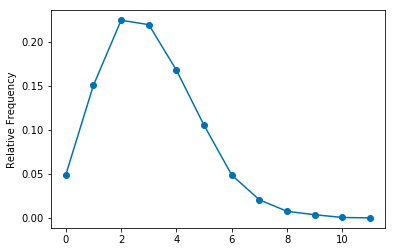

In [13]:
RV(Poisson(3)).sim(10000).plot(type="density")

<a id='scatter'></a>

### Scatterplot

Calling `.plot()` on the simulated values of two random variables produces a scatterplot of points in the $(x, y)$ plane.  A scatterplot is analogous to a rug plot in that each simulated value, in this case an $(x, y)$ pair, is plotted individually.

*Example.* Scatterplot of simulated values of $X$ and $Y$ where $Y$ and $Z$ are i.i.d. Normal(0, 1) and $X = Y + Z$.  (The random variables $X$ and $Y$ have a Bivariate Normal distribution.)  

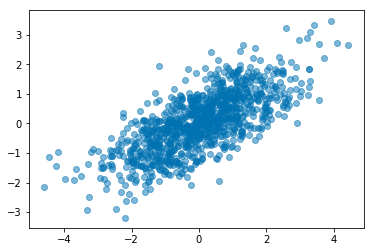

In [14]:
Y, Z = RV(Normal(mean=0, sd=1) ** 2)
X = Y + Z
(X & Y).sim(1000).plot()

For discrete random variables it is recommended to use the `jitter=True` option to better visualize coincident points.

*Example.* Scatterplot of simulated values of $X$ and $Y$ where $Y$ and $Z$ are i.i.d. Poisson(1) and $X = Y + Z$.

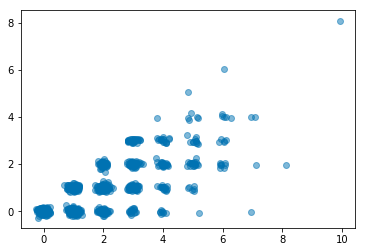

In [15]:
Y, Z = RV(Poisson(1) ** 2)
X = Y + Z
(X & Y).sim(1000).plot(jitter=True)

<a id='tile'></a>

### Tile plot

A scatterplot displays the simulated pairs of values of two random variables.  Several other plot types are available which more explicitly display relative frequencies of pairs.

The two-dimensional analog of an impulse plot is a tile plot.  For two discrete variables, the `tile` plot type produces a **tile plot** (a.k.a. heat map) where rectangles represent the simulated pairs with their relative frequencies visualized on a color scale.

*Example.* Tile plot of simulated values of $X$ and $Y$ where $Y$ and $Z$ are i.i.d. Poisson(1) and $X = Y + Z$.  Compare with the scatterplot above.

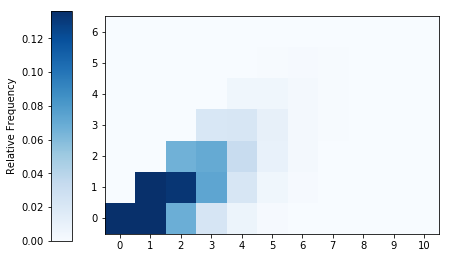

In [16]:
Y, Z = RV(Poisson(1) ** 2)
X = Y + Z
(X & Y).sim(10000).plot(type="tile")

When one of the variables displayed in a tile plot is continuous, the continuous variable is binned (like in a two-dimensional histogram).

*Example.* Tile plot of simulated pairs of one discrete and one continuous random variable.  

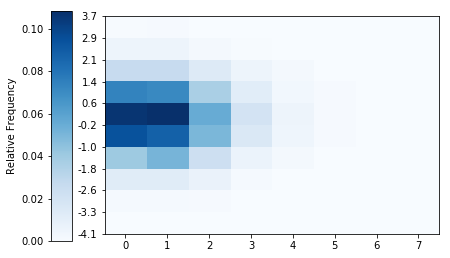

In [17]:
RV(Poisson(1) * Normal(0, 1)).sim(10000).plot(type="tile")

<a id='hist2d'></a>

### Two-dimensional histogram

The continuous analog of a tile plot is a two-dimensional histogram.  For two continuous random variables, plot type `hist` produces a plot in which simulated pairs are placed into rectangular bins, and the density of each bin is visualized using a color scale.

*Example.* Two-dimensional histogram of simulated values of $X$ and $Y$ where $Y$ and $Z$ are i.i.d. Normal(0, 1) and $X = Y + Z$.  Compare with the scatterplot above.  (The random variables $X$ and $Y$ have a Bivariate Normal distribution.)  

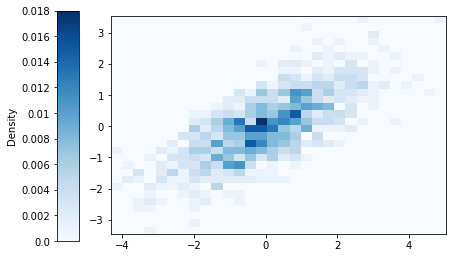

In [18]:
Y, Z = RV(Normal(mean=0, sd=1) ** 2)
X = Y + Z
(X & Y).sim(1000).plot(type="hist")

The relative frequency of simulated values falling in a particular bin is the product of a bin's area and its density value.

The number of bins can be controlled with the `bins` argument, which can take a list of two values, one for each of the $x$ and $y$ variables.

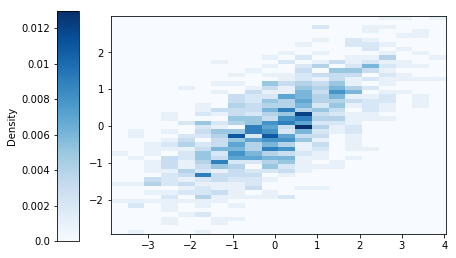

In [20]:
Y, Z = RV(Normal(mean=0, sd=1) ** 2)
X = Y + Z
(X & Y).sim(1000).plot(type="hist", bins=[20, 50])

Two dimensional histograms can be also produced for two discrete random variables.

*Example*.  Two-dimensional histogram of two i.i.d. Poisson(100) random variables.

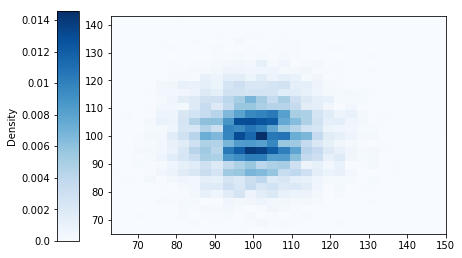

In [21]:
RV(Poisson(100) ** 2).sim(10000).plot("hist")

<a id='density2d'></a>

### Two-dimensional density

For two continuous random variables, plot type `density` uses the simulated $(x, y)$ to estimate the joint probability density function and plot it.

*Example.* Two-dimensional histogram of simulated values of $X$ and $Y$ where $Y$ and $Z$ are i.i.d. Normal(0, 1) and $X = Y + Z$.  Compare with the scatterplot and two-dimensional histogram above.  (The random variables $X$ and $Y$ have a Bivariate Normal distribution.)  

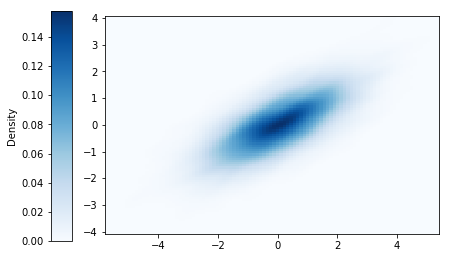

In [22]:
Y, Z = RV(Normal(mean=0, sd=1) ** 2)
X = Y + Z
(X & Y).sim(10000).plot(type="density")

<a id='path'></a>

### Sample path plot

For simulated outcomes of a `RandomProcess`, the `plot` method produces a sample path plot of process values as functions of time.  The `alpha` argument &mdash; which takes values between 0 and 1 &mdash; controls the darkness of the plotted paths.

*Example.* A single sample path of a discrete time, discrete state Markov chain.

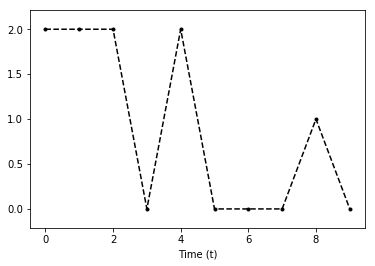

In [23]:
TransitionMatrix = [[0.3, 0.2, 0.5],
                   [0.5, 0.3, 0.2],
                   [0.3, 0.0, 0.7]]

InitialDistribution = [0, 0, 1]

X = MarkovChain(TransitionMatrix, InitialDistribution)

X.sim(1).plot(alpha=1)

*Example.*  Five sample paths of a Poisson process.

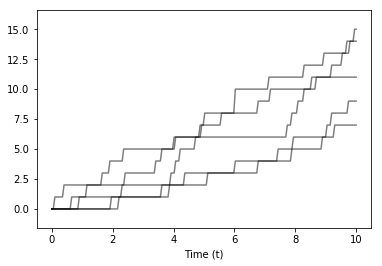

In [24]:
PoissonProcess(rate=1).sim(5).plot(alpha=0.5)

*Example.* Simulated sinusoids with random amplitude and phase.

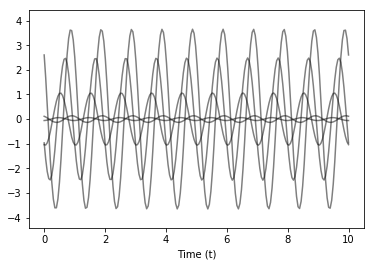

In [25]:
P = (Exponential(1) * Uniform(0, 2 * pi))

def f(omega, t):
    return omega[0] * sin(2 * pi * t + omega[1])

X = RandomProcess(P, TimeIndex(fs=inf), f)

X.sim(5).plot(alpha=0.5)

<a id='custom'></a>

### Customizing plots

While the default plot produced by the `plot` method is  typically an effective visualization of simulated values of the random variables or processes involved, there are several ways in which plots can be customized.

The examples above illustrate some of the options for the `type` argument of the `plot` method.

* `rug`: Plot simulated values along a number line.
* `impulse`: The default plot type for simulated values of a single discrete random variable.
* `hist`: A one-dimensional histogram is the default plot type for simulated values of a single continuous random variable.  The `hist` type produces both one- and two-dimensional histograms as appropriate.
* `scatter`: The default plot type for simulated pairs of values of two random variables. 
* `density`: Produces both one- and two-dimensional density plots as appropriate.
* `tile`: Tile plot; primarily used with simulated values of two discrete random variables.

The `type` argument can take a list of values to produce one graphic displaying multiple types.

*Example.* Histogram, density, and rug plot of 100 simulated values of a random variable with an Exponential distribution with rate 1.

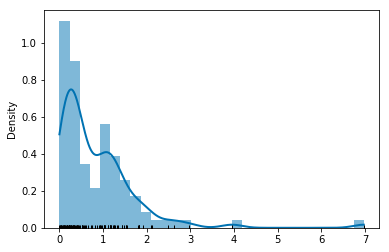

In [26]:
RV(Exponential(rate=1)).sim(100).plot(["hist", "density", "rug"])

Multiple calls to `plot` within a Jupyter notebook cell produces a single figure with the graphics superimposed.

*Example.* Histograms comparing two sets of simulated values.

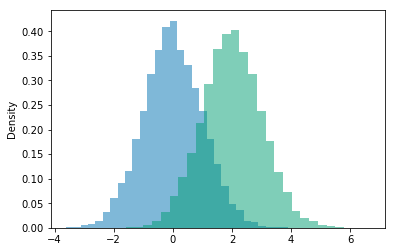

In [27]:
RV(Normal(mean=0, sd=1)).sim(10000).plot()
RV(Normal(mean=2, sd=1)).sim(10000).plot()

When plots are superimposed, the `alpha` argument &mdash; which takes values between 0 and 1 &mdash; controls the level of transparency.

*Example.* Scatterplots comparing two sets of simulated values.

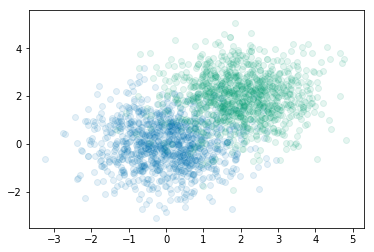

In [28]:
X, Y = RV(Normal(0,1) ** 2)
(X & Y).sim(1000).plot(alpha=0.1)
((X+2) & (Y+2)).sim(1000).plot(alpha=0.1)

When overlaying several discrete distributions in a plot, it is recommended to use the `jitter=True` option so that the bars do not coincide.

*Example.* Comparison of simulated values from a Binomial(10, 0.1) distribution and from a Poisson(1) distribution.

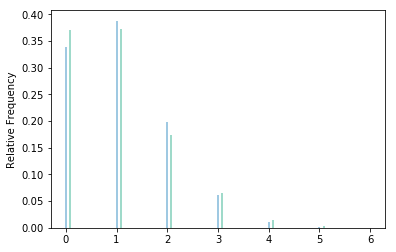

In [29]:
RV(Binomial(10, 0.1)).sim(10000).plot()
RV(Poisson(1)).sim(10000).plot(jitter=True)

Symbulate imports the [Matplotlib](https://matplotlib.org/) plotting library as `plt`.  Matplotlib commands can be called to customize plots with titles, legends, etc.

*Example.* Histograms comparing two sets of simulated values.  Notice the plot title and legend.

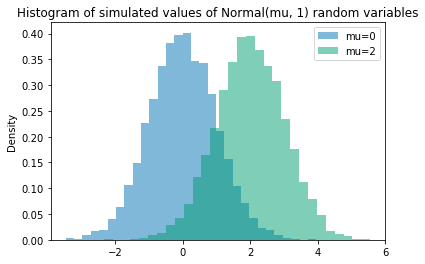

In [30]:
RV(Normal(mean=0, sd=1)).sim(10000).plot()
RV(Normal(mean=2, sd=1)).sim(10000).plot()

plt.legend(["mu=0", "mu=2"])
plt.title("Histogram of simulated values of Normal(mu, 1) random variables")

< [Markov processes](mc.html) | [Contents](index.html)  >